# Sentiment Analysis of YouTube Data Using TextBlob and Visualization Using Wordcloud


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#imported all the basic libraries

In [14]:
df_comments=pd.read_csv("GBcomments.csv",error_bad_lines=False)
# read dataset of Global Comments using pandas 

b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [15]:
df_comments.head()

video_id                                       comment_text  likes  \
0  jt2OHQh0HoQ  It's more accurate to call it the M+ (1000) be...      0   
1  jt2OHQh0HoQ              To be there with a samsung phone\n😂😂😂      1   
2  jt2OHQh0HoQ  Thank gosh, a place I can watch it without hav...      0   
3  jt2OHQh0HoQ  What happened to the home button on the iPhone...      0   
4  jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   

   replies  
0        0  
1        0  
2        0  
3        0  
4        0

In [16]:
!pip install textblob# install TextBlob library

In [17]:
from textblob import TextBlob

In [18]:
TextBlob("It's more accurate to call it the M+ (1000) be...").sentiment.polarity

0.45000000000000007

In [19]:
df_comments.isnull().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [20]:
df_comments.dropna(inplace=True)

In [ ]:
listA =[]
for i in df_comments['comment_text']:
    listA.append(TextBlob(i).sentiment.polarity)
# Used for loop to get polarity of all the comments

In [ ]:
df_comments['Polarity']=listA

In [ ]:
df_comments.head()

In [72]:
df_PositiveComments=df_comments[df_comments['Polarity']>= 0.5]

In [73]:
df_NegativeComments=df_comments[df_comments['Polarity']<-0.5]

In [74]:
df_PositiveComments.head()

video_id                                       comment_text  likes  \
4   jt2OHQh0HoQ  Power is the disease.  Care is the cure.  Keep...      0   
9   jt2OHQh0HoQ  I'm only here to see Emma, I love her so much!...      0   
10  jt2OHQh0HoQ           Mom said: Just one more video before bed      0   
14  jt2OHQh0HoQ                             more one before to bed      0   
15  jt2OHQh0HoQ                subscribe me if you love your mummy      0   

    replies  Polarity  
4         0       1.0  
9         0       0.5  
10        0       0.5  
14        0       0.5  
15        0       0.5

In [75]:
df_NegativeComments.head()

video_id                                       comment_text  likes  \
99   jt2OHQh0HoQ           Fuck i want this !!! But i have no money      0   
233  T_PuZBdT2iM  I was disappointed with the level the comedy r...      0   
241  T_PuZBdT2iM  i beat up a kid like this in highschool, i hat...      0   
253  T_PuZBdT2iM  Yeah but you can speak Korean so this video is...      0   
287  T_PuZBdT2iM                                   U still ugly tho      1   

     replies  Polarity  
99         2  -0.78125  
233        0  -0.75000  
241        0  -0.80000  
253        0  -0.80000  
287        0  -0.70000

In [17]:
!pip install wordcloud# install Wordcloud Library

In [18]:
from wordcloud import WordCloud,STOPWORDS

In [19]:
stopwords=set(STOPWORDS)

In [79]:
Complete_commentsP=' '.join(df_PositiveComments['comment_text'])

In [80]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(Complete_commentsP)

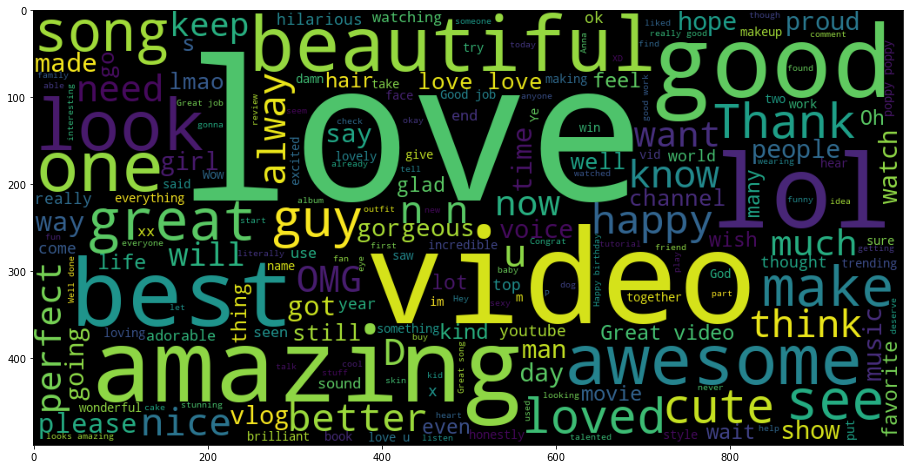

In [81]:
plt.figure(figsize=(20,8))
plt.imshow(wordcloud)

In [82]:
Complete_commentsN=' '.join(df_NegativeComments['comment_text'])

In [83]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(Complete_commentsN)

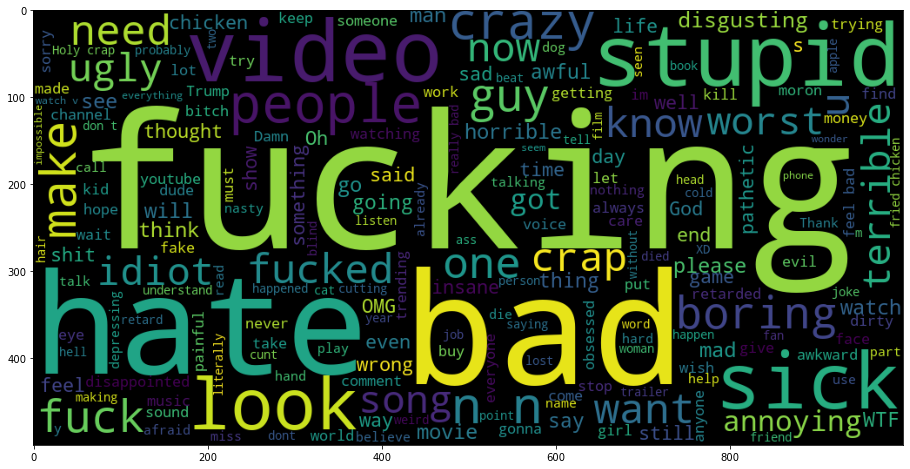

In [84]:
plt.figure(figsize=(20,8))
plt.imshow(wordcloud)

In [5]:
df_videosData=pd.read_csv("GBvideos.csv",error_bad_lines=False)

b'Skipping line 2398: expected 11 fields, saw 21\nSkipping line 2797: expected 11 fields, saw 21\n'


In [6]:
df_videosData.head()

video_id                                              title  \
0  jt2OHQh0HoQ  Live Apple Event - Apple September Event 2017 ...   
1  AqokkXoa7uE  Holly and Phillip Meet Samantha the Sex Robot ...   
2  YPVcg45W0z4                    My DNA Test Results! I'm WHAT?!   
3  T_PuZBdT2iM  getting into a conversation in a language you ...   
4  NsjsmgmbCfc                               Baby Name Challenge!   

       channel_title  category_id  \
0        Apple Event           28   
1       This Morning           24   
2       emmablackery           24   
3              ProZD            1   
4  Sprinkleofglitter           26   

                                                tags    views  likes  \
0  apple events|apple event|iphone 8|iphone x|iph...  7426393  78240   
1  this morning|interview|holly willoughby|philli...   494203   2651   
2  emmablackery|emma blackery|emma|blackery|briti...   142819  13119   
3  skit|korean|language|conversation|esl|japanese...  1580028  65729   
4  sprinkleofglitter|sprinkle of glitter|baby gli...    40592   5019   

   dislikes  comment_total                                     thumbnail_link  \
0     13548            705  https://i.ytimg.com/vi/jt2OHQh0HoQ/default_liv...   
1      1309              0     https://i.ytimg.com/vi/AqokkXoa7uE/default.jpg   
2       151           1141     https://i.ytimg.com/vi/YPVcg45W0z4/default.jpg   
3      1529           3598     https://i.ytimg.com/vi/T_PuZBdT2iM/default.jpg   
4        57            490     https://i.ytimg.com/vi/NsjsmgmbCfc/default.jpg   

    date  
0  13.09  
1  13.09  
2  13.09  
3  13.09  
4  13.09

In [7]:
Complete_Tags=' '.join(df_videosData['tags'])

In [10]:
Complete_Tags

"apple events|apple event|iphone 8|iphone x|iphone 8 plus|iphone 7s|iphone 7s plus|ios 11 this morning|interview|holly willoughby|phillip schofield|ruth langsford|eamonn holmes|chat shows - topic|chat show - topic|talk shows - topic|sex robot|samantha|real life emmablackery|emma blackery|emma|blackery|british vlogger|british youtuber|female vlogger|birdyboots|dna test|23andme|ancestry skit|korean|language|conversation|esl|japanese|foreign|communication|don't speak|struggle|foreigner|lotte mart|korea|south|weather|good|tutorial sprinkleofglitter|sprinkle of glitter|baby glitter|Louise Pentland|Louise Pentland Baby Name|Mrs Meldrum|Baby Names|Nice baby names|Unusual baby names Rio Ferdinand|Rio|Ferdinand|5 Magazine|5 Mag|#5|5 Rio Ferdinand|Rio Ferdinand interview|football|soccer|interview|Manchester United|Man United|fifa 18|fut 18|fut|fifa ratings|fifa 18 ratings|chelsea|chelsea fc|chelsea f.c|David Luiz|Eden Hazard|Christensen|Premier League|Champions League|Fifa18|Hazard Fifa 18|David

In [11]:
import re

In [12]:
Complete_Tags_new=re.sub('[^a-zA-Z]',' ',Complete_Tags)

In [13]:
Complete_Tags_new

'apple events apple event iphone   iphone x iphone   plus iphone  s iphone  s plus ios    this morning interview holly willoughby phillip schofield ruth langsford eamonn holmes chat shows   topic chat show   topic talk shows   topic sex robot samantha real life emmablackery emma blackery emma blackery british vlogger british youtuber female vlogger birdyboots dna test   andme ancestry skit korean language conversation esl japanese foreign communication don t speak struggle foreigner lotte mart korea south weather good tutorial sprinkleofglitter sprinkle of glitter baby glitter Louise Pentland Louise Pentland Baby Name Mrs Meldrum Baby Names Nice baby names Unusual baby names Rio Ferdinand Rio Ferdinand   Magazine   Mag      Rio Ferdinand Rio Ferdinand interview football soccer interview Manchester United Man United fifa    fut    fut fifa ratings fifa    ratings chelsea chelsea fc chelsea f c David Luiz Eden Hazard Christensen Premier League Champions League Fifa   Hazard Fifa    David

In [14]:
Complete_Tags_new=re.sub(' +',' ',Complete_Tags_new)

In [15]:
Complete_Tags_new

'apple events apple event iphone iphone x iphone plus iphone s iphone s plus ios this morning interview holly willoughby phillip schofield ruth langsford eamonn holmes chat shows topic chat show topic talk shows topic sex robot samantha real life emmablackery emma blackery emma blackery british vlogger british youtuber female vlogger birdyboots dna test andme ancestry skit korean language conversation esl japanese foreign communication don t speak struggle foreigner lotte mart korea south weather good tutorial sprinkleofglitter sprinkle of glitter baby glitter Louise Pentland Louise Pentland Baby Name Mrs Meldrum Baby Names Nice baby names Unusual baby names Rio Ferdinand Rio Ferdinand Magazine Mag Rio Ferdinand Rio Ferdinand interview football soccer interview Manchester United Man United fifa fut fut fifa ratings fifa ratings chelsea chelsea fc chelsea f c David Luiz Eden Hazard Christensen Premier League Champions League Fifa Hazard Fifa David Luiz Fifa Christensen Fifa Chelsea Fifa

In [20]:
wordcloud=WordCloud(width=1000,height=500,stopwords=stopwords).generate(Complete_Tags_new)

(-0.5, 999.5, 499.5, -0.5)

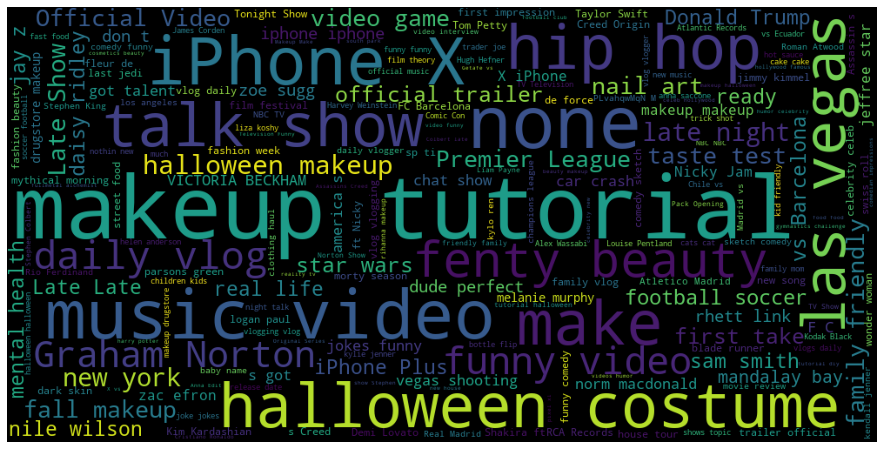

In [21]:
plt.figure(figsize=(20,8))
plt.imshow(wordcloud)
plt.axis('off')

In [23]:
df_new=df_videosData[['views','likes','dislikes']]

In [25]:
df_new.corr()

views     likes  dislikes
views     1.000000  0.866249  0.671703
likes     0.866249  1.000000  0.623797
dislikes  0.671703  0.623797  1.000000

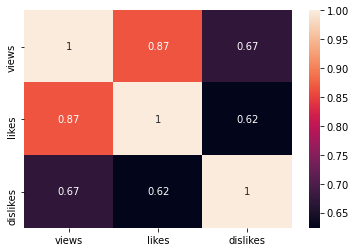

In [26]:
sns.heatmap(df_new.corr(),annot=True)